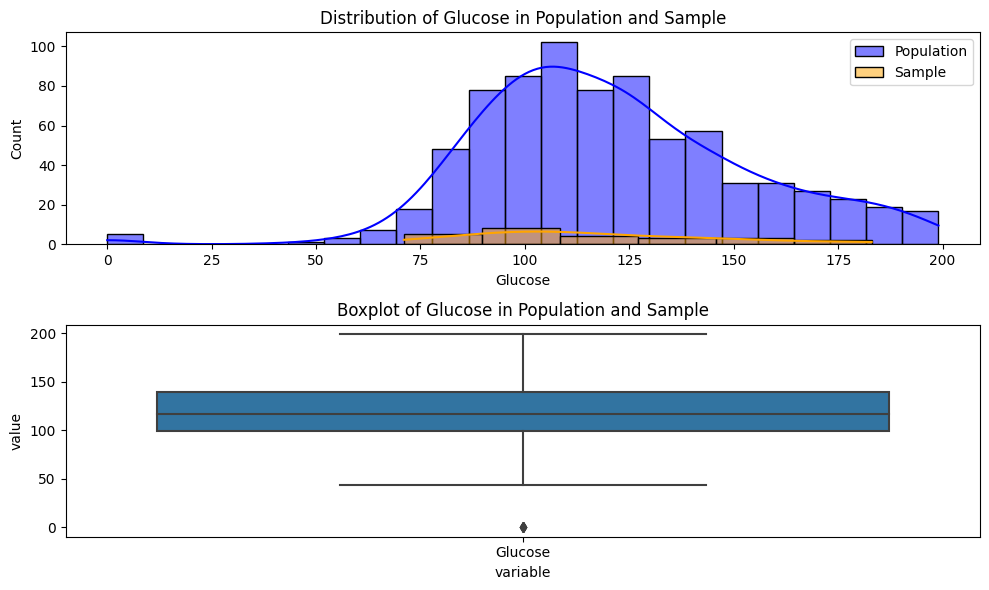

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/diabetes.csv')

# Set a seed for reproducibility
np.random.seed(42)

# a) Random sample of 25 observations
sample = df.sample(25)
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Comparison using charts
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.histplot(df['Glucose'], kde=True, color='blue', label='Population')
sns.histplot(sample['Glucose'], kde=True, color='orange', label='Sample')
plt.title('Distribution of Glucose in Population and Sample')
plt.legend()

plt.subplot(2, 1, 2)
sns.boxplot(x='variable', y='value', data=pd.melt(pd.concat([df['Glucose'], sample['Glucose']], axis=1)))
plt.title('Boxplot of Glucose in Population and Sample')

plt.tight_layout()
plt.show()

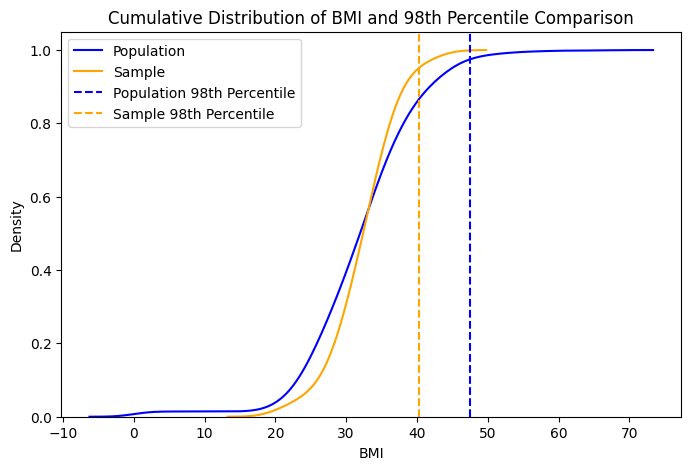

In [ ]:
# b) 98th percentile of BMI
population_percentile_bmi = np.percentile(df['BMI'], 98)
sample_percentile_bmi = np.percentile(sample['BMI'], 98)

# Comparison using charts
plt.figure(figsize=(8, 5))

sns.kdeplot(df['BMI'], cumulative=True, color='blue', label='Population')
sns.kdeplot(sample['BMI'], cumulative=True, color='orange', label='Sample')
plt.axvline(population_percentile_bmi, color='blue', linestyle='dashed', label='Population 98th Percentile')
plt.axvline(sample_percentile_bmi, color='orange', linestyle='dashed', label='Sample 98th Percentile')
plt.title('Cumulative Distribution of BMI and 98th Percentile Comparison')
plt.legend()

plt.show()

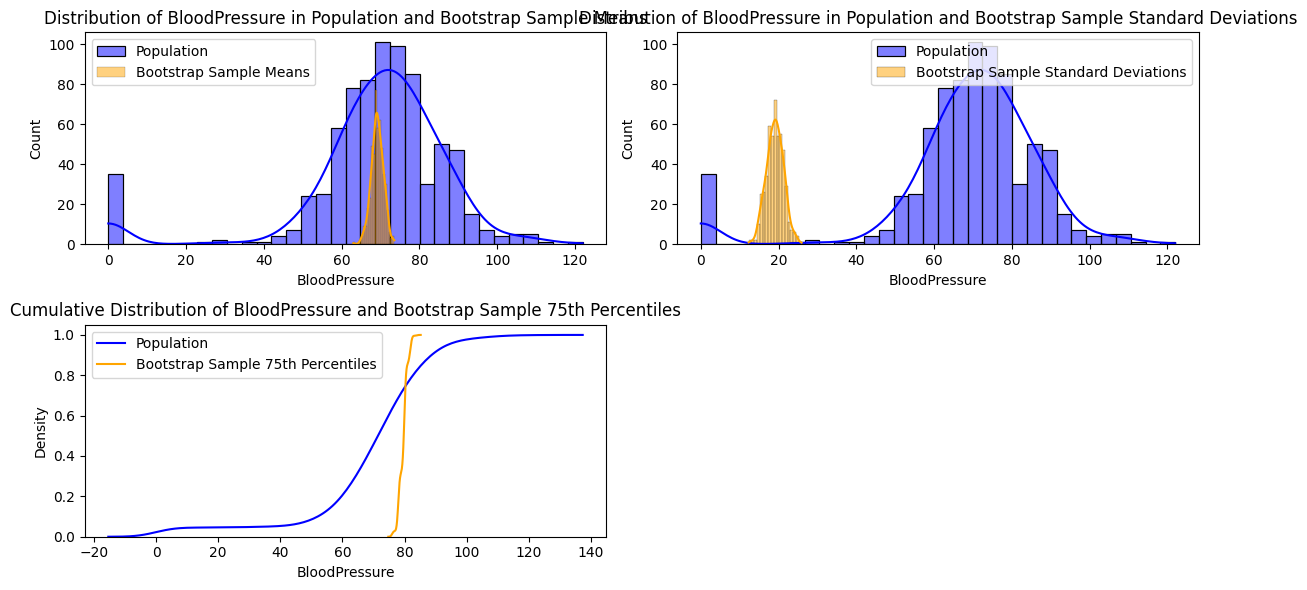

a) Population Mean Glucose: 120.89453125, Sample Mean Glucose: 116.64
   Population Max Glucose: 199, Sample Max Glucose: 183
b) Population 98th Percentile BMI: 47.52599999999996, Sample 98th Percentile BMI: 40.248
c) Statistics for BloodPressure:
   Population Mean: 69.10546875, Bootstrap Sample Mean: 69.17696
   Population Standard Deviation: 19.355807170644777, Bootstrap Sample Standard Deviations Mean: 19.08274018350705
   Population 75th Percentile: 80.0, Bootstrap Sample 75th Percentiles Mean: 79.548


In [ ]:
# c) Bootstrap sampling
n_samples = 500
sample_size = 150
bootstrap_samples = [df.sample(sample_size, replace=True) for _ in range(n_samples)]

# Calculate statistics for BloodPressure
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_bp = np.percentile(df['BloodPressure'], 75)  # Using 75th percentile for example

bootstrap_means = [sample['BloodPressure'].mean() for sample in bootstrap_samples]
bootstrap_stds = [sample['BloodPressure'].std() for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample['BloodPressure'], 75) for sample in bootstrap_samples]

# Comparison using charts
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['BloodPressure'], kde=True, color='blue', label='Population')
sns.histplot(bootstrap_means, kde=True, color='orange', label='Bootstrap Sample Means')
plt.title('Distribution of BloodPressure in Population and Bootstrap Sample Means')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='blue', label='Population')
sns.histplot(bootstrap_stds, kde=True, color='orange', label='Bootstrap Sample Standard Deviations')
plt.title('Distribution of BloodPressure in Population and Bootstrap Sample Standard Deviations')
plt.legend()

plt.subplot(2, 2, 3)
sns.kdeplot(df['BloodPressure'], cumulative=True, color='blue', label='Population')
sns.kdeplot(bootstrap_percentiles, cumulative=True, color='orange', label='Bootstrap Sample 75th Percentiles')
plt.title('Cumulative Distribution of BloodPressure and Bootstrap Sample 75th Percentiles')
plt.legend()

plt.tight_layout()
plt.show()

# Report findings
print(f'a) Population Mean Glucose: {population_mean_glucose}, Sample Mean Glucose: {sample_mean_glucose}')
print(f'   Population Max Glucose: {population_max_glucose}, Sample Max Glucose: {sample_max_glucose}')

print(f'b) Population 98th Percentile BMI: {population_percentile_bmi}, Sample 98th Percentile BMI: {sample_percentile_bmi}')

print('c) Statistics for BloodPressure:')
print(f'   Population Mean: {population_mean_bp}, Bootstrap Sample Mean: {np.mean(bootstrap_means)}')
print(f'   Population Standard Deviation: {population_std_bp}, Bootstrap Sample Standard Deviations Mean: {np.mean(bootstrap_stds)}')
print(f'   Population 75th Percentile: {population_percentile_bp}, Bootstrap Sample 75th Percentiles Mean: {np.mean(bootstrap_percentiles)}')